In [1]:
#MERGED DATA

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import utils

data = pd.read_csv('/Users/selinzobu/Desktop/TILES/111OMFITBASES111.csv', parse_dates = ['Timestamp'])
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
#fitbit["Timestamp"] = pd.to_datetime(fitbit["Timestamp"], utc=True)
#print(data.columns)

bases = pd.read_csv('/Users/selinzobu/Desktop/TILES/1BASESTRESSD.csv', parse_dates = ['Timestamp'])
bases = bases.loc[:, ~bases.columns.str.contains('^Unnamed')]

FOM = pd.read_csv('/Users/selinzobu/Desktop/TILES/1FITOMSTRESSD.csv', parse_dates = ['Timestamp'])
FOM = FOM.loc[:, ~FOM.columns.str.contains('^Unnamed')]

X = data.iloc[:,2:65]  #independent columns
X = X.drop('days', axis = 1)
y = data.iloc[:,-1]    #target column 

X_base = bases.drop(['participant_id', 'Timestamp', 'mstressd'], axis = 1)  #independent columns
y_base = bases['mstressd']    #target column 

X_FOM = FOM.drop(['participant_id', 'Timestamp', 'mstressd', 'days'], axis = 1)  #independent columns
y_FOM = FOM['mstressd']   #target column 

#for col in X.columns:
 #   X[col] = X[col].apply(pd.to_numeric, errors='coerce')

In [2]:
#before taking a pre-processing step we first need to split our dataset into training and 
#testing tests. The former will be used for model training and the latter for evaluating 
#the performance of the trained model.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_base, y_base, test_size=0.3, random_state=42)

XFOM_train, XFOM_test, yFOM_train, yFOM_test = train_test_split(
    X_FOM, y_FOM, test_size=0.3, random_state=42)

In [3]:
# Normality test original data

from scipy import stats as scs

print(scs.shapiro(y))
print(scs.shapiro(X))
print(scs.shapiro(y_train))
print(scs.shapiro(X_train))
print(scs.shapiro(yb_train))
print(scs.shapiro(Xb_train))
print(scs.shapiro(yFOM_train))
print(scs.shapiro(XFOM_train))
print(scs.shapiro(y_test))
print(scs.shapiro(X_test))
print(scs.shapiro(yb_test))
print(scs.shapiro(Xb_test))
print(scs.shapiro(yFOM_test))
print(scs.shapiro(XFOM_test))

ShapiroResult(statistic=0.8583763241767883, pvalue=1.401298464324817e-45)
ShapiroResult(statistic=0.13089293241500854, pvalue=0.0)
ShapiroResult(statistic=0.8550655245780945, pvalue=3.4487636765190938e-40)
ShapiroResult(statistic=0.13055014610290527, pvalue=0.0)
ShapiroResult(statistic=0.8171676993370056, pvalue=0.0)
ShapiroResult(statistic=0.6907700300216675, pvalue=0.0)
ShapiroResult(statistic=0.8539082407951355, pvalue=4.910289948840591e-41)
ShapiroResult(statistic=0.19624578952789307, pvalue=0.0)
ShapiroResult(statistic=0.8638865947723389, pvalue=3.5548703209562825e-27)
ShapiroResult(statistic=0.13167649507522583, pvalue=0.0)
ShapiroResult(statistic=0.8181965947151184, pvalue=1.401298464324817e-45)
ShapiroResult(statistic=0.6898342370986938, pvalue=0.0)
ShapiroResult(statistic=0.8607083559036255, pvalue=5.133230191988882e-28)
ShapiroResult(statistic=0.19541776180267334, pvalue=0.0)


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [4]:
#!pip install BorutaShap 1
#from BorutaShap import BorutaShap

In [5]:
#BorutaShap 2
#Feature_Selector = BorutaShap(importance_measure='shap',
 #                             classification=False)

In [6]:
#BorutaShap 3 FITOM
Feature_Selector.fit(X=XFOM_train, y=yFOM_train, n_trials=100, sample=False,
                     train_or_test = 'test', normalize=True, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

10 attributes confirmed important: ['RMSStdDev_msM', 'StdDevBreathingRateS', 'Cardio_caloriesOut', 'StdDevYAccel_gM', 'AvgZAccel_gM', 'AvgYAccel_gM', 'StdDevBreathingRateM', 'AvgGForceM', 'StdDevYAccel_gS', 'AvgBreathingRateM']
20 attributes confirmed unimportant: ['AvgYAccel_gS', 'RestingHeartRate', 'AvgZAccel_gS', 'StdDevZAccel_gS', 'StdDevGForceM', 'AvgHeartRateM', 'AvgXAccel_gS', 'StdDevGForceS', 'RMSStdDev_msS', 'Fat Burn_caloriesOut', 'SDNN_msS', 'NumberSteps', 'Fat Burn_minutes', 'AvgBreathingRateS', 'StdDevXAccel_gM', 'AvgHeartRateS', 'StdDevXAccel_gS', 'SleepMinutesInBed', 'SleepMinutesAsleep', 'AvgGForceS']
3 tentative attributes remains: ['AvgXAccel_gM', 'SDNN_msM', 'StdDevZAccel_gM']


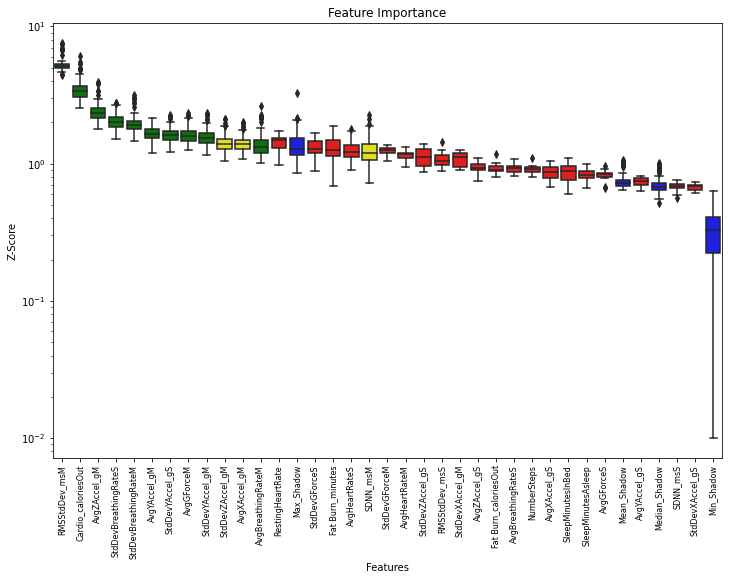

In [7]:
# BorutaShap 4- Returns Boxplot of features
Feature_Selector.plot(which_features='all')

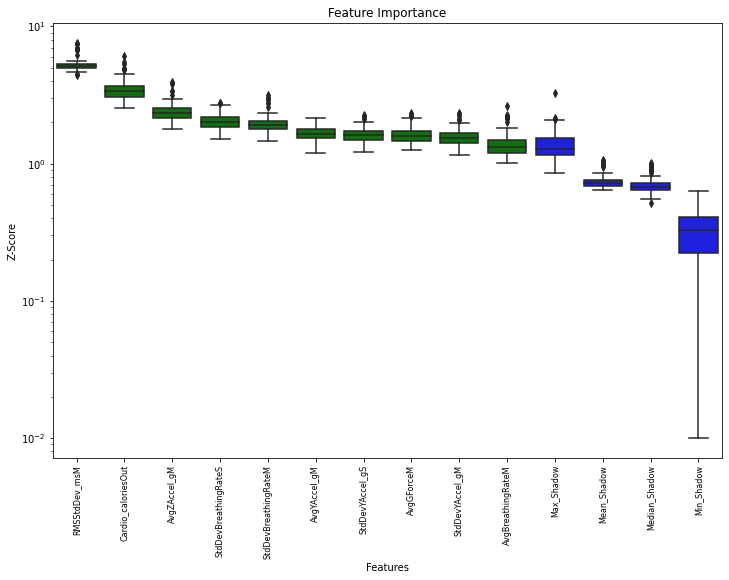

In [8]:
Feature_Selector.plot(which_features='accepted' )

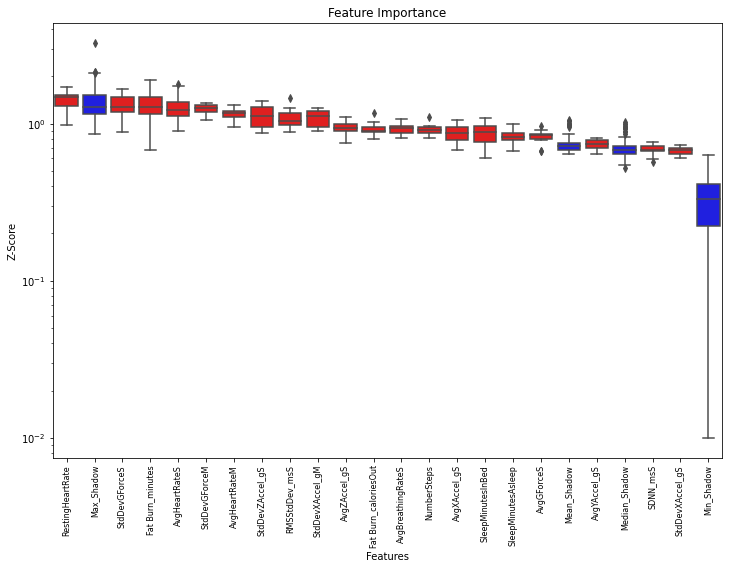

In [9]:
Feature_Selector.plot(which_features='rejected')

In [10]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape,'y_test:', y_test.shape)
#print(y_test.head())
print('Xb_train:', Xb_train.shape, 'Xb_test:', Xb_test.shape, 'yb_train:', yb_train.shape,'yb_test:', yb_test.shape)
#print(yb_test.head())
print('XFOM_train:', XFOM_train.shape, 'XFOM_test:', XFOM_test.shape, 'yFOM_train:', yFOM_train.shape,'yFOM_test:', yFOM_test.shape)
#print(yFOM_test.head())

X_train: (2092, 62) X_test: (897, 62) y_train: (2092,) y_test: (897,)
Xb_train: (5507, 29) Xb_test: (2361, 29) yb_train: (5507,) yb_test: (2361,)
XFOM_train: (2188, 33) XFOM_test: (938, 33) yFOM_train: (2188,) yFOM_test: (938,)


In [11]:
## BORUTA

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import pandas as pd
import numpy as np

In [12]:
# let's initialize a RF model 
model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)

#model.fit(X_train, y_train)
#model.fit(Xb_train, yb_train)
model.fit(XFOM_train, yFOM_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)

In [13]:
# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=3,
    estimator=model,
    n_estimators='auto',
    max_iter=20  # number of iterations to perform
)

In [14]:
# train Boruta
# N.B.: X_train and y_train must be numpy arrays
borres = feat_selector.fit(np.array(XFOM_train), np.array(yFOM_train))

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	6
Tentative: 	13
Rejected: 	14
Iteration: 	9 / 20
Confirmed: 	6
Tentative: 	13
Rejected: 	14
Iteration: 	10 / 20
Confirmed: 	6
Tentative: 	13
Rejected: 	14
Iteration: 	11 / 20
Confirmed: 	6
Tentative: 	13
Rejected: 	14
Iteration: 	12 / 20
Confirmed: 	7
Tentative: 	10
Rejected: 	16
Iteration: 	13 / 20
Confirmed: 	7
Tentative: 	10
Rejected: 	16
Iteration: 	14 / 20
Confirmed: 	7
Tentative: 	10
Rejected: 	16
Iteration: 	15 / 20
Confirmed: 	7
Tentative: 	10
Rejected: 	16
Iteration: 	16 / 20
Confirmed: 	10
Tentative: 	7
Rejected: 	16
Iteratio

In [19]:
# check selected features
print(feat_selector.support_)

# check ranking of features
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
#X_filtered = feat_selector.transform(X)

[ True False False False False False False False  True  True False  True
 False False False False False  True False  True False False False  True
  True  True False False False  True False False False]
[ 1  2  9  8  3 17 19  2  1  1  7  1  5  4 10  3 18  1 16  1 11  2 16  1
  1  1  2 13 14  1  6  2 12]


In [21]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(XFOM_train.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

accepted = []

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    if feat[2] == True:
        accepted.append(feat[0])

Feature: Cardio_caloriesOut        Rank: 1,  Keep: True
Feature: Fat Burn_caloriesOut      Rank: 2,  Keep: False
Feature: Fat Burn_minutes          Rank: 9,  Keep: False
Feature: NumberSteps               Rank: 8,  Keep: False
Feature: RestingHeartRate          Rank: 3,  Keep: False
Feature: SleepMinutesAsleep        Rank: 17,  Keep: False
Feature: SleepMinutesInBed         Rank: 19,  Keep: False
Feature: AvgHeartRateM             Rank: 2,  Keep: False
Feature: AvgHeartRateS             Rank: 1,  Keep: True
Feature: RMSStdDev_msM             Rank: 1,  Keep: True
Feature: RMSStdDev_msS             Rank: 7,  Keep: False
Feature: AvgBreathingRateM         Rank: 1,  Keep: True
Feature: AvgBreathingRateS         Rank: 5,  Keep: False
Feature: AvgGForceM                Rank: 4,  Keep: False
Feature: AvgGForceS                Rank: 10,  Keep: False
Feature: AvgXAccel_gM              Rank: 3,  Keep: False
Feature: AvgXAccel_gS              Rank: 18,  Keep: False
Feature: AvgYAccel_gM          

In [22]:
print(len(accepted))
print((accepted))

10
['Cardio_caloriesOut', 'AvgHeartRateS', 'RMSStdDev_msM', 'AvgBreathingRateM', 'AvgYAccel_gM', 'AvgZAccel_gM', 'StdDevBreathingRateM', 'StdDevBreathingRateS', 'StdDevGForceM', 'StdDevYAccel_gM']


In [23]:
# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", XFOM_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              XFOM_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])


------Support and Ranking for each feature------
Passes the test:  Cardio_caloriesOut  - Ranking:  1
Doesn't pass the test:  Fat Burn_caloriesOut  - Ranking:  2
Doesn't pass the test:  Fat Burn_minutes  - Ranking:  9
Doesn't pass the test:  NumberSteps  - Ranking:  8
Doesn't pass the test:  RestingHeartRate  - Ranking:  3
Doesn't pass the test:  SleepMinutesAsleep  - Ranking:  17
Doesn't pass the test:  SleepMinutesInBed  - Ranking:  19
Doesn't pass the test:  AvgHeartRateM  - Ranking:  2
Passes the test:  AvgHeartRateS  - Ranking:  1
Passes the test:  RMSStdDev_msM  - Ranking:  1
Doesn't pass the test:  RMSStdDev_msS  - Ranking:  7
Passes the test:  AvgBreathingRateM  - Ranking:  1
Doesn't pass the test:  AvgBreathingRateS  - Ranking:  5
Doesn't pass the test:  AvgGForceM  - Ranking:  4
Doesn't pass the test:  AvgGForceS  - Ranking:  10
Doesn't pass the test:  AvgXAccel_gM  - Ranking:  3
Doesn't pass the test:  AvgXAccel_gS  - Ranking:  18
Passes the test:  AvgYAccel_gM  - Ranking:  

In [41]:
'''df = pd.DataFrame(X)
df['target'] = y
df.head()
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
clf = RandomForestClassifier(max_depth=2)
for i in range(4):
    clf.fit(df[i].values.reshape(-1, 1), df['target'])
    sns.boxplot(x = 'target', y = i, data = df)
    plt.title(f"Accuracy: {clf.score(df[i].values.reshape(-1, 1), df['target'])}")
    plt.show()'''

'df = pd.DataFrame(X)\ndf[\'target\'] = y\ndf.head()\nfrom sklearn.ensemble import RandomForestClassifier\nimport seaborn as sns \nimport matplotlib.pyplot as plt\nclf = RandomForestClassifier(max_depth=2)\nfor i in range(4):\n    clf.fit(df[i].values.reshape(-1, 1), df[\'target\'])\n    sns.boxplot(x = \'target\', y = i, data = df)\n    plt.title(f"Accuracy: {clf.score(df[i].values.reshape(-1, 1), df[\'target\'])}")\n    plt.show()'

In [24]:
#Permutation Feature Importance for ML Interpretability

from sklearn.ensemble import RandomForestRegressor

# Instantiate a Random Forest Regressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
# Fit a random forest regressor
regr.fit(XFOM_train, yFOM_train)

#At this point, feel free to take some time to tune the hyperparameters of your random 
#forest regressor. But, since this isn’t a guide on hyperparameter tuning, I am going to 
#continue with this naive random forest model — it’ll be fine for illustrating the 
#usefulness of permutation feature importance.

RandomForestRegressor(max_depth=100, random_state=0)

In [25]:
#Let’s calculate the RMSE of our model predictions and store it as rmse_full_mod.

from sklearn.metrics import mean_squared_error
rmse_full_mod = mean_squared_error(regr.predict(XFOM_test), yFOM_test, squared = False)

In [26]:
#Now, we can implement permutation feature importance by shuffling each predictor and 
#recording the increase in RMSE. This will allow us to assess which predictors are useful 
#for making predictions. 

# Initialize a list of results
results = []
# Iterate through each predictor
for predictor in XFOM_test:
    
    # Create a copy of X_test
    XFOM_test_copy = XFOM_test.copy()
    
    # Scramble the values of the given predictor
    XFOM_test_copy[predictor] = XFOM_test[predictor].sample(frac=1).values
    
    # Calculate the new RMSE
    new_rmse = mean_squared_error(regr.predict(XFOM_test_copy), yFOM_test,
                                  squared = False)
    
    # Append the increase in MSE to the list of results 
    results.append({'pred': predictor,
                    'score': new_rmse - rmse_full_mod })
# Convert to a pandas dataframe and rank the predictors by score
resultsdf = pd.DataFrame(results).sort_values(by = 'score',
                                              ascending = False)

In [27]:
#The resulting dataframe contains permutation feature importance scores. Large scores 
#correspond to large increases in RMSE — evidence of worse model performance when a 
#predictor was shuffled.

#have relatively large values, meaning that they have predictive power in our model.

#Poor Performance in the Presence of Multicollinearity
#Scores are relative, not absolute
#Feature importance still isn’t statistical inference: Feature importance techniques can 
#only tell you how useful a predictor is — they don’t give any insight into the nature of 
#the relationship (ex. linear, quadratic, etc.) or the magnitude of the predictor’s effect.
#Permutation feature importance is not a replacement for statistical inference, but rather 
#an alternative solution for when it’s impossible to perform traditional inference.

resultsdf[0:10]

,pred,score
19,AvgZAccel_gM,0.019072
9,RMSStdDev_msM,0.014489
17,AvgYAccel_gM,0.014425
11,AvgBreathingRateM,0.013275
29,StdDevYAccel_gM,0.008563
21,SDNN_msM,0.007917
30,StdDevYAccel_gS,0.007580
4,RestingHeartRate,0.007162
31,StdDevZAccel_gM,0.006757
15,AvgXAccel_gM,0.006706


In [28]:
from matplotlib import pyplot

# plot feature importance
#pyplot.bar([x for x in range(len(resultsdf))], resultsdf)
#pyplot.show()

In [29]:
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

importance = results
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))

Feature: 0  Score: {'pred': 'Cardio_caloriesOut', 'score': 0.005183834887685701}
Feature: 1  Score: {'pred': 'Fat Burn_caloriesOut', 'score': 0.0026414735235631426}
Feature: 2  Score: {'pred': 'Fat Burn_minutes', 'score': 0.003443104553858767}
Feature: 3  Score: {'pred': 'NumberSteps', 'score': 0.0024907925847390544}
Feature: 4  Score: {'pred': 'RestingHeartRate', 'score': 0.007162481601803439}
Feature: 5  Score: {'pred': 'SleepMinutesAsleep', 'score': 0.0015047997718216077}
Feature: 6  Score: {'pred': 'SleepMinutesInBed', 'score': 0.001738489197198545}
Feature: 7  Score: {'pred': 'AvgHeartRateM', 'score': 0.0038693753403659104}
Feature: 8  Score: {'pred': 'AvgHeartRateS', 'score': 0.0037196698979189424}
Feature: 9  Score: {'pred': 'RMSStdDev_msM', 'score': 0.014489142652389764}
Feature: 10  Score: {'pred': 'RMSStdDev_msS', 'score': 0.0036651462702040893}
Feature: 11  Score: {'pred': 'AvgBreathingRateM', 'score': 0.013274710393800793}
Feature: 12  Score: {'pred': 'AvgBreathingRateS', '

In [30]:
#Correlation Feature Selection

#selecting the top k most relevant features (largest values) via the SelectKBest class.
#define the SelectKBest class to use the f_regression() function and select all features,
#then transform the train and test sets.

#The scikit-learn machine library provides an implementation of the correlation statistic 
#in the f_regression() function. This function can be used in a feature selection strategy

from sklearn.feature_selection import SelectKBest, f_regression

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fit = fs.fit(XFOM_train, yFOM_train)
# transform train input data
XFOM_train_fs = fs.transform(XFOM_train)
# transform test input data
XFOM_test_fs = fs.transform(XFOM_test)
#print(X_train_fs, X_test_fs, fs)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(XFOM_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs      Score
1   Fat Burn_caloriesOut  20.912480
2       Fat Burn_minutes  19.881658
17          AvgYAccel_gM  19.476865
21              SDNN_msM  15.651505
31       StdDevZAccel_gM  15.347702
8          AvgHeartRateS  13.360533
11     AvgBreathingRateM  11.422007
25         StdDevGForceM   8.925348
23  StdDevBreathingRateM   8.182216
9          RMSStdDev_msM   7.903169


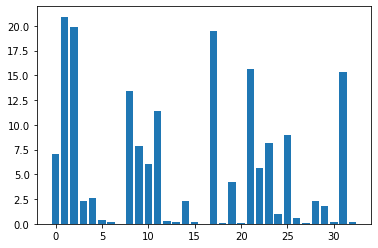

In [33]:
# what are scores for the features
#for i in range(len(fs.scores_)):
	#print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [34]:
#Step 3: Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

XFOM_train_scaled = scaler.fit_transform(XFOM_train)
XFOM_test_scaled = scaler.transform(XFOM_test)

print(XFOM_train_scaled, XFOM_test_scaled)

[[-0.38227731 -0.25831004 -0.53151878 ... -0.05120512  0.22705945
  -0.4242612 ]
 [ 3.55464681 -0.31387592 -0.38310286 ...  0.47652876 -1.27560011
  -1.04993969]
 [-0.38227731 -0.50320039 -0.67592346 ... -0.29379624  1.93980855
   1.65723817]
 ...
 [ 7.02721409  1.25562983  1.63856266 ... -0.40614306 -1.05779311
  -0.18578072]
 [-0.19607432  0.19748858  0.38705543 ...  0.4271011  -0.23286596
   1.27384141]
 [-0.38227731 -0.46214583 -0.4753614  ...  0.53226292  1.14283093
   0.95701146]] [[-3.82277309e-01 -2.67174217e-01 -7.42372932e-02 ... -1.69038875e-01
  -2.52853040e-01 -5.94253119e-01]
 [-2.99319641e-01  1.99978653e+00  9.96764084e-01 ... -2.54151967e-01
   5.70566229e-01 -4.42956178e-01]
 [ 6.48543203e-01 -1.49756084e-01 -6.91968424e-01 ...  1.47048252e+00
  -5.13383081e-01 -4.54904461e-01]
 ...
 [ 2.94103705e-02 -6.14352300e-02 -2.50731902e-01 ... -4.30939827e-01
  -2.98517967e-01 -6.13194031e-01]
 [-3.82277309e-01  4.03892755e-01 -1.46439633e-01 ...  1.01242073e-01
   9.30546891

In [40]:
#Step 4: Apply Dimensionality Reduction using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
XFOM_train_dim_red = pca.fit_transform(XFOM_train_scaled)
XFOM_test_dim_red = pca.transform(XFOM_test_scaled)

print(XFOM_train_dim_red, XFOM_test_dim_red)
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)

[[ 0.86150639  0.18550029]
 [ 1.57021814  2.17581763]
 [ 2.68951868  0.73093483]
 ...
 [-2.69394351  1.28074753]
 [ 0.26037359  0.22421146]
 [-0.58491809 -0.62174534]] [[-0.95450361  0.10037061]
 [-0.4107445  -2.30064431]
 [ 4.90057871  1.10937236]
 ...
 [-2.09845604  0.06336206]
 [ 1.77509219 -2.70339635]
 [-2.44195355  0.52541848]]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2188 but corresponding boolean dimension is 2092

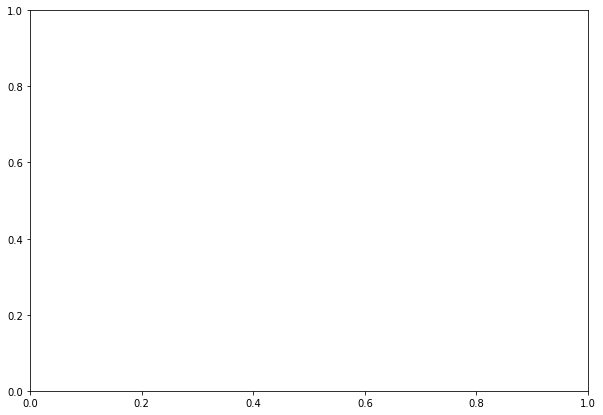

In [41]:
# Visualise results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
for label, color in zip(set(yFOM_train), ('orange', 'blue', 'brown')):
    ax.scatter(
        XFOM_train_dim_red[y_train == label, 0],
        XFOM_train_dim_red[y_train == label, 1],
        color=color, label=f'Class {label}'
    )

ax.set_title('Dataset after Principal Component Analysis ')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(loc='upper right')

In [6]:
#!pip install boruta
#Note: Standardization is only applicable on the data values that follows Normal 
#Distribution.
#Two most popular feature scaling techniques are:

#Z-Score Standardization
#Min-Max Normalization
#In statistics and machine learning, min-max normalization of data is a process of 
#converting original range of data to the range between 0 and 1.

'''
The main idea behind normalization/standardization is always the same. Variables that are 
measured at different scales do not contribute equally to the model fitting & model learned 
function and might end up creating a bias. Thus, to deal with this potential problem 
feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

Note: Tree-based models are usually not dependent on scaling, but non-tree models models 
such as SVM, LDA etc. are often hugely dependent on it.

One important thing to keep in mind when using the MinMax Scaling is that it is highly 
influenced by the maximum and minimum values in our data so if our data contains outliers 
it is going to be biased.

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. 
This is done feature-wise in an independent way.

Recommended way: Use the RobustScaler that will just scale the features but in this case 
using statistics that are robust to outliers. This scaler removes the median and scales the
data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the
range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

normalize() or StandardScaler() from sklearn won’t change the shape of your data.

normalisation > the main difference here is that it will present numbers between 0 and 1 
(but it won’t center the data on mean 0 and std =1).

Including very large and very small numbers in a regression can lead to computational
problems. When you normalize or standardize, you mitigate the problem.


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(df)

print(normalized_data)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

'''

'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\n\nnormalized_data = scaler.fit_transform(df)\n\nprint(normalized_data)'

In [43]:
print(yFOM_train.value_counts())

1.0    836
2.0    558
3.0    408
1.5    136
2.5    134
4.0     67
3.5     35
5.0     12
4.5      2
Name: mstressd, dtype: int64


In [44]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(yFOM_train)

#view transformed values
print(y_transformed)

[2 0 3 ... 4 0 4]


In [ ]:
'''Now that we have identified the features to drop, we can confidently drop them and 
proceed with our normal routine. You can even use the .transform()method to automatically 
drop them. You may want to try other feature selection methods to suit your needs, but 
Boruta uses one of the most powerful algorithms out there, and is quick and easy to use.'''

#https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a

In [ ]:
###Converting series to dataframes
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
X_train_processed = pd.DataFrame(X_train_ohe.todense(), 
columns=columns)
X_test_processed = pd.DataFrame(X_test_ohe.todense(), columns=columns)
###Instantiating Standard Scaler
ss = StandardScaler()
###Converting continuous feature values to floats
X_train_cont = X_train[cont_features].astype(float)
X_test_cont = X_test[cont_features].astype(float)
###Fitting scaler to training continuous features and transforming ###train and test
X_train_scaled = ss.fit_transform(X_train_cont)
X_test_scaled = ss.transform(X_test_cont)
###Concatenating scaled and encoded dataframes
X_train_a2 = pd.concat([pd.DataFrame(X_train_scaled), X_train_processed], axis=1)
X_test_a2 = pd.concat([pd.DataFrame(X_test_scaled), X_test_processed], axis=1)

#https://towardsdatascience.com/feature-selection-with-borutapy-f0ea84c9366

In [20]:
#https://towardsdatascience.com/feature-selection-with-boruta-in-python-676e3877e596

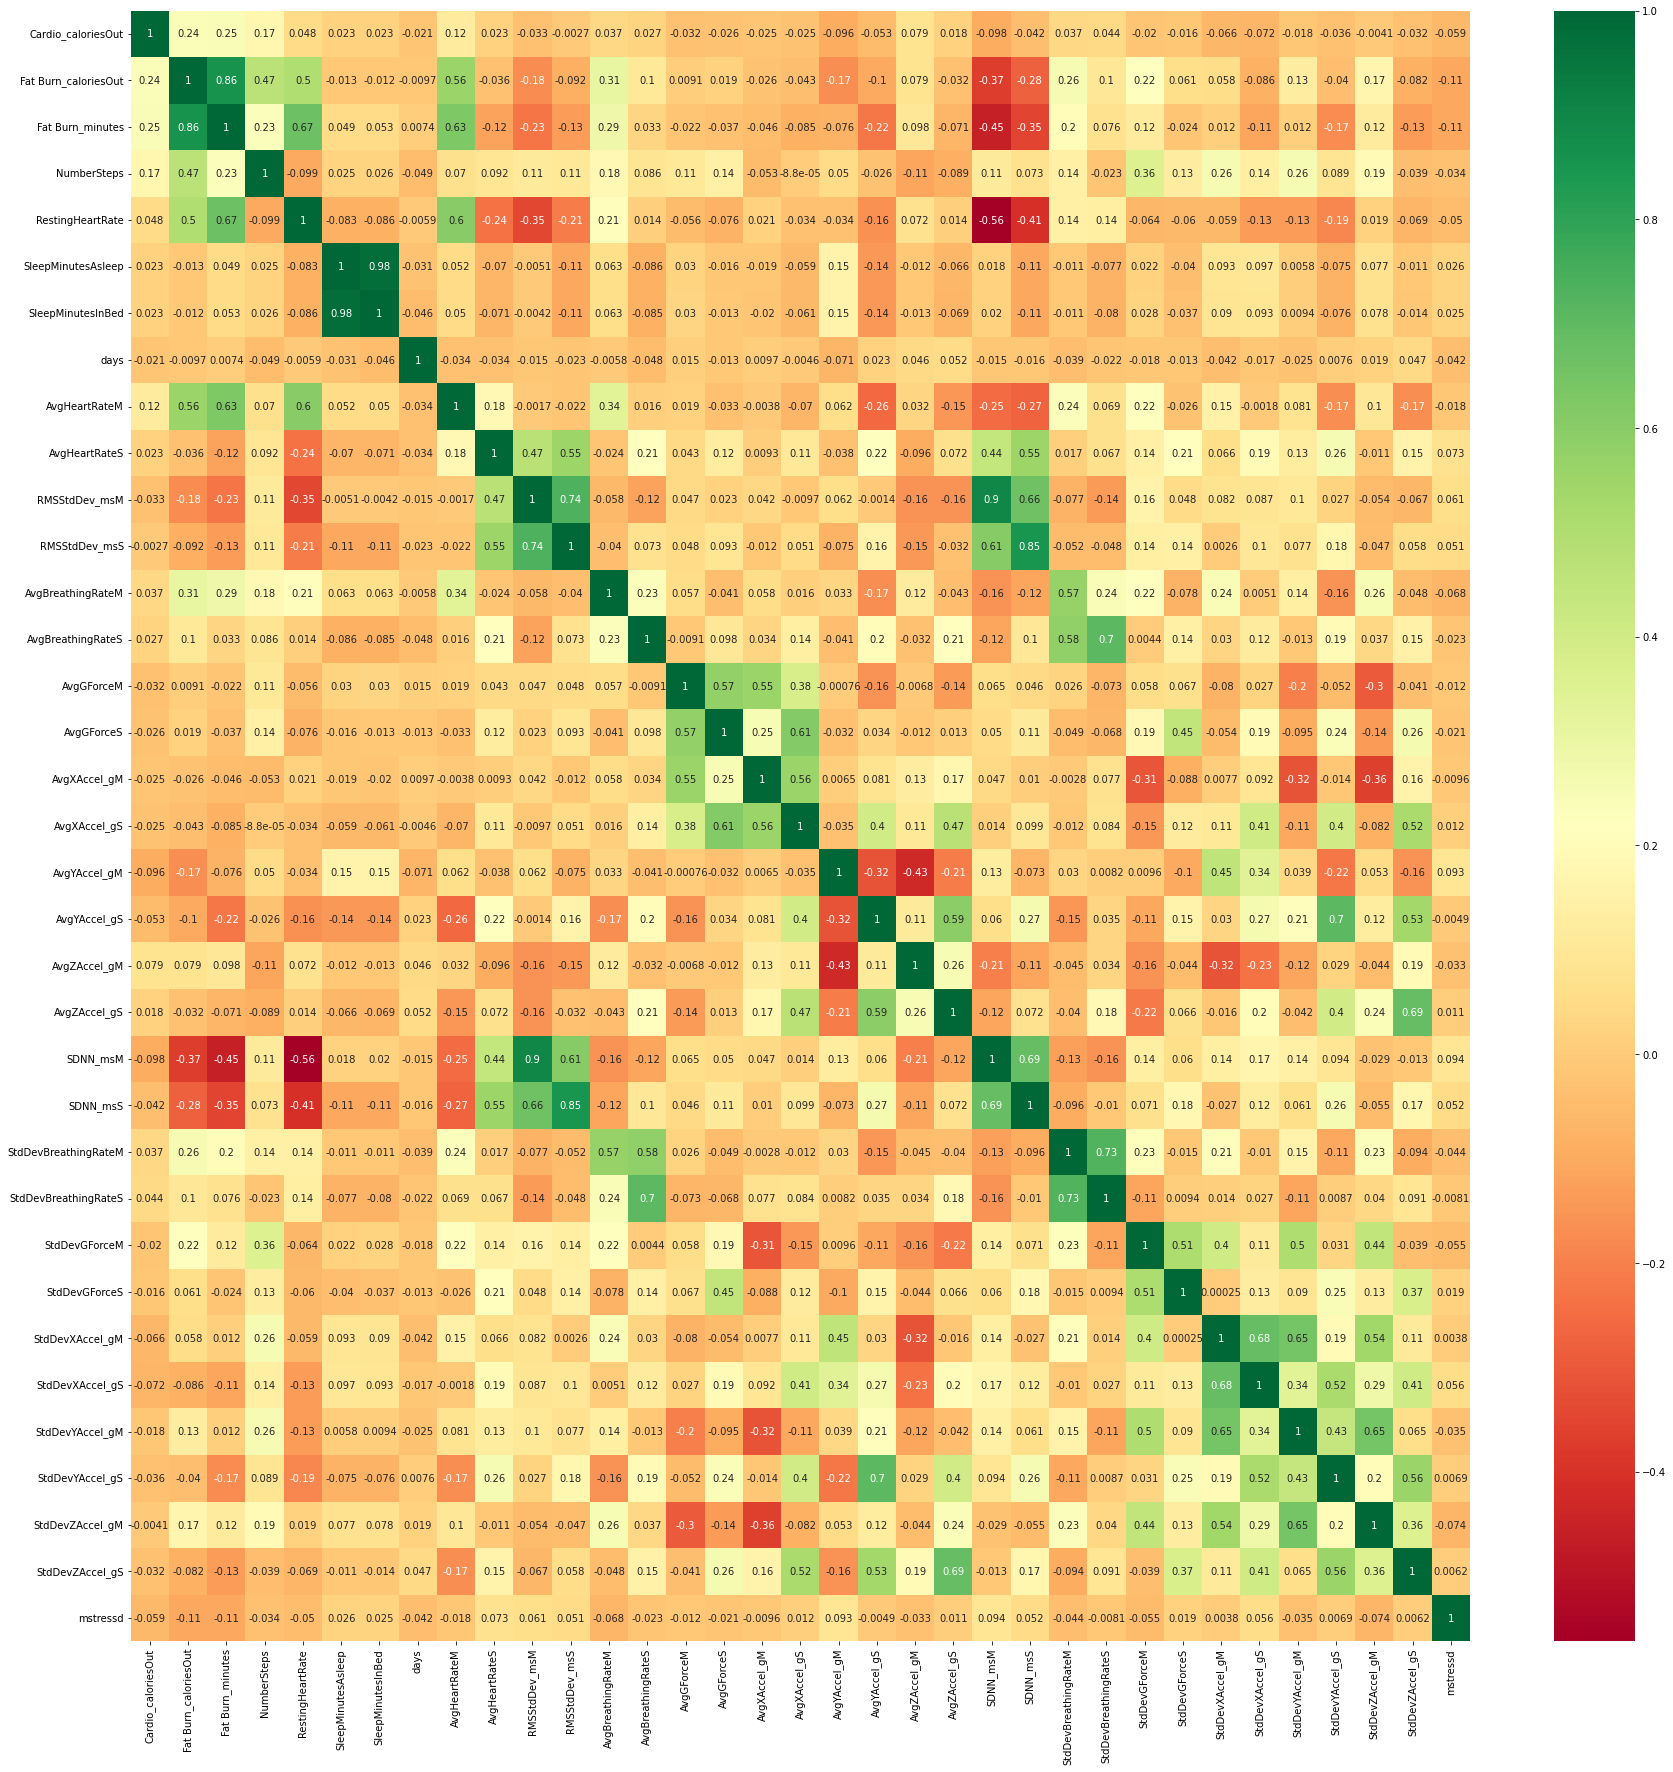

In [46]:
#Heatmap makes it easy to identify which features are most related to the target variable,
#we will plot heatmap of correlated features using the seaborn library.

import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = FOM.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")